In [ ]:
%load_ext tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
!pip install fasttext
!pip install keras-tuner

In [52]:
import pandas as pd
import numpy as np
import requests
import fasttext
from time import sleep

MODEL KODUJACY NAZWY

In [53]:
names_symbols = pd.read_csv('/content/names_and_symbols.csv')
names_symbols.drop_duplicates(subset=['baseTokenName'], inplace=True)
names_symbols.reset_index(drop=True, inplace=True)
names_symbols

,baseTokenName,baseTokenSymbol
0,book of meme,bome
1,billionairebeefcoin,bibc
2,blockchain operating system,sbos
3,cat arm,catarm
4,crazypepe,crazypepe
...,...,...
8548,majestic moose,mmoos
8549,doobie,doobie
8550,kingkoin,kkr
8551,coomvurse,coomvurse


MODEL FASTTEXT

---



In [54]:
df = pd.read_csv('/content/tokens_details.csv')
df.drop_duplicates(subset=['pairAddress'], inplace=True)
df = df.loc[df['worthy'] != -1]
df.reset_index(drop=True, inplace=True)
df.to_csv('token_details_cleaned.csv', index=False)
df

,chainId,dexId,url,pairAddress,baseTokenAddress,baseTokenName,baseTokenSymbol,quoteTokenAddress,quoteTokenName,quoteTokenSymbol,...,priceChange_m5,priceChange_h1,priceChange_h6,priceChange_h24,liquidity_usd,liquidity_base,liquidity_quote,fdv,pairCreatedAt,worthy
0,solana,raydium,https://dexscreener.com/solana/4dzdgmrdvrddnar...,4dZdGmrdvrDdNaru9qCJ5ZyBfDpYLRajoE5xjERJcE9p,DiEsXLSCCaKdcFus9YXyhbAmghsizuqTCJQdNK35AKAL,Pepe The Rasta,$RASTA,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,46.12,46.12,46.12,46.12,22448.41,572020119.0,63.81860,19598.0,2024-03-24 20:56:17,1.0
1,solana,raydium,https://dexscreener.com/solana/a9eutfmmr4kszwj...,A9EUTFmmr4kszWjiebpS9t6FEbrVc2f8T49PZLf8xiYi,AYABiqKuTh9Va5Aqc6AujFevHwDGmECGQiFmKW5g3K4Z,Nobiko Coin,LONG,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,75.09,75.09,75.09,75.09,5123.43,652742586.0,14.02399,3926.0,2024-03-25 01:13:49,1.0
2,solana,raydium,https://dexscreener.com/solana/2avbjnsidd99yyy...,2AvbJNsiDD99yYYgk7eGKXuKU4PRVibQYFv6xfNA5Fce,node3SHFNF7h6N9jbztfVcXrZcvAJdns1xAV8CbYFLG,Ligma Node,LIGMA,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,4202.00,4202.00,4202.00,4202.00,13201.27,140892743.0,36.20640,47039.0,2024-03-25 01:49:48,1.0
3,solana,raydium,https://dexscreener.com/solana/83g6vzjzlrcnhbs...,83G6VzJzLRCnHBsLATj94VCpRimyyqwuN6ZfL11McADL,GtDZKAqvMZMnti46ZewMiXCa4oXF4bZxwQPoKzXPFxZn,nubcat,nub,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,862.00,862.00,862.00,862.00,44140.71,139149344.0,114.42040,166755.0,2024-03-25 03:21:49,1.0
4,solana,orca,https://dexscreener.com/solana/ahtyyjpurljodcr...,AHtyYjpUrLjodCrVHKMTYugrW1jDQ7XjFssb24tqair4,GtDZKAqvMZMnti46ZewMiXCa4oXF4bZxwQPoKzXPFxZn,nubcat,nub,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,0.37,0.37,0.37,0.37,823.05,41662.0,3.30660,5074569.0,2024-03-25 04:55:35,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,solana,raydium,https://dexscreener.com/solana/9d3ksjuzthv8yex...,9D3KSjuzThv8YexvqWGKviXjbTbXgiMWc5BSrmcNi6Bk,9EhqvmxQbaySVcbdyg62YxoB7fxgEFFxgu5ypbGBWQCC,ARI JARDEN,jarden,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,559.00,559.00,559.00,559.00,5083.75,314421308.0,14.12530,8092.0,2024-04-07 09:51:00,0.0
5602,solana,raydium,https://dexscreener.com/solana/87jhr2mvzqzszho...,87JhR2MVZqZsZhocoVbiRpK9ZjcHcToqx9waYBnWkV9P,2SHiMUbaShRZerN2EBGgf37WeEb7dps6JgGwr1xHrjMz,Theory Of Gravity,THOG,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,-99.99,-99.99,-99.99,-99.99,3.66,44759.0,0.02035,0.0,2024-04-07 09:51:29,0.0
5603,solana,raydium,https://dexscreener.com/solana/86d19r3xyxrxahm...,86D19r3xyxRxahmenVa3basHDTmWG4jnZwM39p5NougJ,Dhvf4cfok9QB9876xMEWUSxV9c7owpbCzdag8x4rTGwr,KingKoin,KKR,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,1.46,1.46,1.46,1.46,108770.05,39709859.0,302.19740,54851.0,2024-04-07 09:57:01,0.0
5604,solana,raydium,https://dexscreener.com/solana/6lbgkygsuuv5tpa...,6LBGkYGsuUv5tpAdC64ao6oRdJuesQ77NkermNvqKpbX,4zT2u5Dopu4exqm4hdL9MyiAneHULMa7nJTjXACjgyZu,coomvurse,coomvurse,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,84.28,84.28,84.28,84.28,39151.76,151977226.0,109.27650,128377.0,2024-04-07 09:56:37,0.0


In [55]:
def check_worth(row):
    print(row['pairAddress'], end=' ')
    sleep(0.1)
    try:
        res = requests.get(f"https://api.dexscreener.com/latest/dex/pairs/solana/{row['pairAddress']}").json()
    except Exception as e:
        print(e)
        print(0)
        return 0
    if res['pair'] is None or 'fdv' not in res['pair'] or 'liquidity' not in res['pair'] or 'volume' not in res['pair']:
        print(0)
        return 0
    cur_fdv = res['pair']['fdv']
    cur_liq_usd = res['pair']['liquidity']['usd']
    cur_vol_h1 = res['pair']['volume']['h1']
    if (cur_fdv > row['fdv']*1.1) and (cur_liq_usd > row['liquidity_usd']*1.1) and (cur_fdv > 10_000 and cur_liq_usd > 10_000 and cur_vol_h1 > 1_000):
        print(1)
        return 1
    else:
        print(0)
        return 0

# Calculate midpoint of the DataFrame to consider only the first half
midpoint = len(df) // 2

# Apply the function to the first half of the DataFrame
df.loc[:midpoint, 'worthy'] = df.iloc[:midpoint].apply(check_worth, axis=1)

4dZdGmrdvrDdNaru9qCJ5ZyBfDpYLRajoE5xjERJcE9p 0
A9EUTFmmr4kszWjiebpS9t6FEbrVc2f8T49PZLf8xiYi 1
2AvbJNsiDD99yYYgk7eGKXuKU4PRVibQYFv6xfNA5Fce 1
83G6VzJzLRCnHBsLATj94VCpRimyyqwuN6ZfL11McADL 1
AHtyYjpUrLjodCrVHKMTYugrW1jDQ7XjFssb24tqair4 0
6b3pGVYwAemYXuCQCH2qQee3zyp3nzeqgpoyxUXSCQbc 1
BSzedbEvWRqVksaF558epPWCM16avEpyhm2HgSq9WZyy 1
CuqjSCxdrN2AapHZK4kqEpPSKfFXq7UgJdcgPreg8m4i 0
ALfUwqjxScTv85VWTdXkpRDvndnKkscDvAu3SiTKeFAs 0
GYPTU3SVN74ePPeNYVgYQhp1MqCm1XdtrBh4KUStpJj 1
6RPaoSUicBVmvmXLuyif35kjBtgkwLJUiqdJgDnqD5BC 0
CjwyPobWimPBXtwCh7Q8tYBw5Aj9NTRXnZHhwxHdDrmN 1
4CbztYaTFaYWxJXDKym2jM8KaAMzqCyPe14LkhmKrChL 0
FjpoqZYkcx9meLKPUTfU62bZonbJejBTbwVjmctzi7er 0
7PQbmy5unrspLCD6dqYNP8kscKHeVVgshWz346PAgKJV 0
8SB4r1bcMcjamF6hZKDCy69CrhKZNtxgGYwtioP94qWF 0
B1KTTWPesbc8pBohiQASX3sBb4SrK3eyUaTpyr45FsdS 0
8qVzAqfhs4ofcFmu9X1krWWo26qTQwjSGzdsKGsE3PUy 1
Fen9Xzdb6PgXnqAMk3QhzhSiLYdNbtvATH3hQ9cbMVWM 1
6hrJmT2bSHvRJXYbmPUYgM8hG69WGP7fq3LcyYoM9SbU 1
EeEAsY3CeKSL8hJELRkJb6Jcq8i7RYuvg6igvueMpWZb 0
DBGSMtmjdFPP61

In [56]:
df.to_csv('token_details.csv', index=False)

In [57]:
names_symbols = pd.concat([names_symbols, df[['baseTokenName', 'baseTokenSymbol']]], axis=0)
names_symbols.drop_duplicates(subset=['baseTokenName'], inplace=True)
names_symbols.reset_index(drop=True, inplace=True)
names_symbols['baseTokenName'] = names_symbols['baseTokenName'].str.lower()
names_symbols['baseTokenSymbol'] = names_symbols['baseTokenSymbol'].str.lower()
names_symbols.to_csv('names_and_symbols.csv', index=False)
names_symbols

,baseTokenName,baseTokenSymbol
0,book of meme,bome
1,billionairebeefcoin,bibc
2,blockchain operating system,sbos
3,cat arm,catarm
4,crazypepe,crazypepe
...,...,...
12518,popdog,$popdog
12519,majestic moose,mmoos
12520,doobie,doobie
12521,kingkoin,kkr


In [58]:
with open('baseTokenName.txt', 'w', encoding='utf-8') as f:
    for entry in names_symbols['baseTokenName']:  # Zmień na nazwę kolumny, którą chcesz użyć
        f.write(str(entry) + '\n')  # Zapewniamy, że każda wartość jest stringiem

with open('baseTokenSymbol.txt', 'w', encoding='utf-8') as f:
    for entry in names_symbols['baseTokenSymbol']:  # Zmień na nazwę kolumny, którą chcesz użyć
        f.write(str(entry) + '\n')  # Zapewniamy, że każda wartość jest stringiem

In [59]:
najdluzszy_index = names_symbols['baseTokenName'].apply(len).idxmax()
najdluzszy_string = names_symbols.loc[najdluzszy_index, 'baseTokenName']
print(f'najdluzszy_string: {len(najdluzszy_string)} najdluzszy_string: {najdluzszy_string}')

najdluzszy_string: 53 najdluzszy_string: boba oppa bobam3u8qmqzhy1hwatnvze9dlxvkgkyk3td3t8mlva


In [60]:
srednia_dlugosc_nazwy = names_symbols['baseTokenName'].apply(len).mean()
srednia_dlugosc_nazwy

10.936836221352712

In [61]:
# names model
model_n = fasttext.train_unsupervised('baseTokenName.txt',
                                    model='skipgram',
                                    dim=24,
                                    minCount=1,
                                    minn=2,
                                    verbose=1)
model_n.save_model('token_names_model.bin')

# symbols model
model_s = fasttext.train_unsupervised('baseTokenSymbol.txt',
                                    model='skipgram',
                                    dim=12,
                                    minCount=1,
                                    minn=1,
                                    verbose=1)
model_s.save_model('token_symbols_model.bin')

In [62]:
# ogs = pd.read_csv('/content/ogs.csv')
# ogs.drop_duplicates(subset=['pairAddress'], inplace=True)
# # buy_tokens=[]
# buy_worth = []
# worthy_ones = []

# for index, row in ogs.iterrows():
#   prev_fdv, prev_liq_usd = row['fdv'], row['liquidity_usd']
#   try:
#     res = requests.get(f"https://api.dexscreener.com/latest/dex/pairs/solana/{row['pairAddress']}").json()
#   except:
#     buy_worth.append(0)
#     continue
#   if res['pair'] is None:
#       buy_worth.append(0)
#       continue
#   cur_fdv = res['pair']['fdv']
#   cur_liq_usd = res['pair']['liquidity']['usd']
#   cur_vol_h1 = res['pair']['volume']['h1']
#   if (cur_fdv > prev_fdv*1.1) and (cur_liq_usd > prev_liq_usd*1.1) and (cur_fdv > 10_000 and cur_liq_usd > 10_000 and cur_vol_h1 > 1_000):
#     # buy_tokens.append(row['pairAddress'])
#     print(f"{row['pairAddress']} FDV: {cur_fdv}/{prev_fdv}({(cur_fdv/prev_fdv-1)*100:.0f}%) LIQ: {cur_liq_usd}/{prev_liq_usd} ({(cur_liq_usd/prev_liq_usd-1)*100:.0f}%)")
#     buy_worth.append(1)
#     worthy_ones.append(row)
#     print(f'writing row {type(row)}')
#   else:
#     buy_worth.append(0)

# ogs_df = pd.DataFrame(worthy_ones)
# ogs_df.to_csv('ogs_worthy.csv', index=False)
# ogs_df

In [63]:
names_vectors = df['baseTokenName'].apply(lambda x: pd.Series(model_n.get_word_vector(x)))
names_vectors.columns = [f'nameVectorDim{i}' for i in range(24)]
names_vectors

,nameVectorDim0,nameVectorDim1,nameVectorDim2,nameVectorDim3,nameVectorDim4,nameVectorDim5,nameVectorDim6,nameVectorDim7,nameVectorDim8,nameVectorDim9,...,nameVectorDim14,nameVectorDim15,nameVectorDim16,nameVectorDim17,nameVectorDim18,nameVectorDim19,nameVectorDim20,nameVectorDim21,nameVectorDim22,nameVectorDim23
0,-0.010912,0.014556,-0.010909,-0.001546,0.004347,0.008755,0.010530,-0.003416,0.017691,0.015563,...,-0.006578,-0.006349,-0.001203,0.012290,-0.000501,-0.012071,-0.003629,0.009891,0.008808,-0.007235
1,-0.018344,0.023940,-0.017547,-0.002973,0.006263,0.015411,0.018786,-0.005153,0.026804,0.028052,...,-0.008910,-0.011192,-0.002662,0.019731,-0.001375,-0.020221,-0.004830,0.014669,0.014219,-0.013218
2,-0.018696,0.021412,-0.017774,-0.002797,0.008439,0.012828,0.018324,-0.004061,0.027579,0.026311,...,-0.009562,-0.008794,-0.002185,0.018057,-0.001569,-0.017456,-0.006619,0.014809,0.015860,-0.011285
3,-0.030705,0.040154,-0.032643,-0.002180,0.012874,0.022849,0.036098,-0.012756,0.051254,0.051512,...,-0.020997,-0.019359,-0.004301,0.032834,-0.006153,-0.035526,-0.012876,0.027606,0.025813,-0.024267
4,-0.030705,0.040154,-0.032643,-0.002180,0.012874,0.022849,0.036098,-0.012756,0.051254,0.051512,...,-0.020997,-0.019359,-0.004301,0.032834,-0.006153,-0.035526,-0.012876,0.027606,0.025813,-0.024267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,0.000028,0.000521,0.000116,0.001907,-0.002622,0.000025,0.001056,-0.000483,-0.003407,-0.001669,...,-0.000026,-0.000393,-0.000623,-0.000126,0.001217,0.002030,0.000834,-0.000334,-0.000311,0.000663
5602,-0.011608,0.013859,-0.010878,-0.002129,0.003399,0.007417,0.012926,-0.002681,0.017558,0.015194,...,-0.006120,-0.006302,-0.001011,0.012437,-0.000316,-0.012335,-0.004220,0.009881,0.009006,-0.005123
5603,-0.037359,0.046677,-0.034480,-0.004498,0.015310,0.025079,0.035732,-0.009736,0.055838,0.052983,...,-0.019475,-0.017817,-0.004153,0.037670,-0.001796,-0.035934,-0.012656,0.031591,0.028471,-0.023707
5604,-0.028880,0.032694,-0.030779,-0.004357,0.015492,0.020783,0.027806,-0.012493,0.045416,0.045279,...,-0.019248,-0.019586,-0.001353,0.030213,-0.001732,-0.031673,-0.010810,0.027141,0.025337,-0.017254


In [64]:
symbols_vectors = df['baseTokenSymbol'].apply(lambda x: pd.Series(model_s.get_word_vector(x)))
symbols_vectors.columns = [f'symbolVectorDim{i}' for i in range(12)]
symbols_vectors

,symbolVectorDim0,symbolVectorDim1,symbolVectorDim2,symbolVectorDim3,symbolVectorDim4,symbolVectorDim5,symbolVectorDim6,symbolVectorDim7,symbolVectorDim8,symbolVectorDim9,symbolVectorDim10,symbolVectorDim11
0,0.002120,-0.000941,0.000464,0.001788,0.001174,0.000267,0.000928,0.001255,-0.000043,0.001111,0.000678,-0.002673
1,0.004363,-0.000539,0.003795,-0.003456,0.001263,-0.000974,0.001969,0.001366,-0.000894,0.000310,-0.004284,-0.002772
2,0.000579,-0.001522,-0.001783,-0.005154,0.003293,-0.001786,-0.002489,0.000694,-0.002540,-0.000251,0.000311,-0.000016
3,0.020134,-0.016809,0.024009,0.007233,-0.018580,-0.002907,-0.011651,-0.000205,-0.031351,-0.017084,0.003959,-0.004517
4,0.020134,-0.016809,0.024009,0.007233,-0.018580,-0.002907,-0.011651,-0.000205,-0.031351,-0.017084,0.003959,-0.004517
...,...,...,...,...,...,...,...,...,...,...,...,...
5601,0.013350,-0.015356,0.016773,-0.000286,-0.025294,-0.010877,-0.017326,-0.002885,-0.033742,-0.023768,0.009390,-0.006513
5602,0.003314,-0.001238,0.007999,-0.002722,-0.000742,-0.001237,0.005550,0.000432,0.002402,0.003896,-0.005460,-0.002123
5603,-0.006840,-0.001141,0.009987,0.008792,-0.004132,0.002808,0.004058,-0.001639,0.002391,0.007579,-0.002594,-0.003755
5604,0.020021,-0.017668,0.023075,0.004043,-0.019551,-0.006220,-0.018262,-0.000094,-0.034771,-0.022363,0.007104,-0.011233


In [65]:
df = pd.concat([df, names_vectors, symbols_vectors], axis=1)
df

,chainId,dexId,url,pairAddress,baseTokenAddress,baseTokenName,baseTokenSymbol,quoteTokenAddress,quoteTokenName,quoteTokenSymbol,...,symbolVectorDim2,symbolVectorDim3,symbolVectorDim4,symbolVectorDim5,symbolVectorDim6,symbolVectorDim7,symbolVectorDim8,symbolVectorDim9,symbolVectorDim10,symbolVectorDim11
0,solana,raydium,https://dexscreener.com/solana/4dzdgmrdvrddnar...,4dZdGmrdvrDdNaru9qCJ5ZyBfDpYLRajoE5xjERJcE9p,DiEsXLSCCaKdcFus9YXyhbAmghsizuqTCJQdNK35AKAL,Pepe The Rasta,$RASTA,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,0.000464,0.001788,0.001174,0.000267,0.000928,0.001255,-0.000043,0.001111,0.000678,-0.002673
1,solana,raydium,https://dexscreener.com/solana/a9eutfmmr4kszwj...,A9EUTFmmr4kszWjiebpS9t6FEbrVc2f8T49PZLf8xiYi,AYABiqKuTh9Va5Aqc6AujFevHwDGmECGQiFmKW5g3K4Z,Nobiko Coin,LONG,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,0.003795,-0.003456,0.001263,-0.000974,0.001969,0.001366,-0.000894,0.000310,-0.004284,-0.002772
2,solana,raydium,https://dexscreener.com/solana/2avbjnsidd99yyy...,2AvbJNsiDD99yYYgk7eGKXuKU4PRVibQYFv6xfNA5Fce,node3SHFNF7h6N9jbztfVcXrZcvAJdns1xAV8CbYFLG,Ligma Node,LIGMA,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,-0.001783,-0.005154,0.003293,-0.001786,-0.002489,0.000694,-0.002540,-0.000251,0.000311,-0.000016
3,solana,raydium,https://dexscreener.com/solana/83g6vzjzlrcnhbs...,83G6VzJzLRCnHBsLATj94VCpRimyyqwuN6ZfL11McADL,GtDZKAqvMZMnti46ZewMiXCa4oXF4bZxwQPoKzXPFxZn,nubcat,nub,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,0.024009,0.007233,-0.018580,-0.002907,-0.011651,-0.000205,-0.031351,-0.017084,0.003959,-0.004517
4,solana,orca,https://dexscreener.com/solana/ahtyyjpurljodcr...,AHtyYjpUrLjodCrVHKMTYugrW1jDQ7XjFssb24tqair4,GtDZKAqvMZMnti46ZewMiXCa4oXF4bZxwQPoKzXPFxZn,nubcat,nub,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,0.024009,0.007233,-0.018580,-0.002907,-0.011651,-0.000205,-0.031351,-0.017084,0.003959,-0.004517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,solana,raydium,https://dexscreener.com/solana/9d3ksjuzthv8yex...,9D3KSjuzThv8YexvqWGKviXjbTbXgiMWc5BSrmcNi6Bk,9EhqvmxQbaySVcbdyg62YxoB7fxgEFFxgu5ypbGBWQCC,ARI JARDEN,jarden,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,0.016773,-0.000286,-0.025294,-0.010877,-0.017326,-0.002885,-0.033742,-0.023768,0.009390,-0.006513
5602,solana,raydium,https://dexscreener.com/solana/87jhr2mvzqzszho...,87JhR2MVZqZsZhocoVbiRpK9ZjcHcToqx9waYBnWkV9P,2SHiMUbaShRZerN2EBGgf37WeEb7dps6JgGwr1xHrjMz,Theory Of Gravity,THOG,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,0.007999,-0.002722,-0.000742,-0.001237,0.005550,0.000432,0.002402,0.003896,-0.005460,-0.002123
5603,solana,raydium,https://dexscreener.com/solana/86d19r3xyxrxahm...,86D19r3xyxRxahmenVa3basHDTmWG4jnZwM39p5NougJ,Dhvf4cfok9QB9876xMEWUSxV9c7owpbCzdag8x4rTGwr,KingKoin,KKR,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,0.009987,0.008792,-0.004132,0.002808,0.004058,-0.001639,0.002391,0.007579,-0.002594,-0.003755
5604,solana,raydium,https://dexscreener.com/solana/6lbgkygsuuv5tpa...,6LBGkYGsuUv5tpAdC64ao6oRdJuesQ77NkermNvqKpbX,4zT2u5Dopu4exqm4hdL9MyiAneHULMa7nJTjXACjgyZu,coomvurse,coomvurse,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,0.023075,0.004043,-0.019551,-0.006220,-0.018262,-0.000094,-0.034771,-0.022363,0.007104,-0.011233


In [66]:
df['liq_fdv_ratio'] = df['liquidity_usd']/df['fdv']

In [67]:
# # buy_tokens=[]
# buy_worth = []

# for index, row in df.iterrows():
#   prev_fdv, prev_liq_usd = row['fdv'], row['liquidity_usd']
#   try:
#     res = requests.get(f"https://api.dexscreener.com/latest/dex/pairs/solana/{row['pairAddress']}").json()
#   except:
#     buy_worth.append(0)
#     continue
#   if res['pair'] is None:
#       buy_worth.append(0)
#       continue
#   cur_fdv = res['pair']['fdv']
#   cur_liq_usd = res['pair']['liquidity']['usd']
#   cur_vol_h1 = res['pair']['volume']['h1']
#   if (cur_fdv > prev_fdv*1.1) and (cur_liq_usd > prev_liq_usd*1.1) and (cur_fdv > 10_000 and cur_liq_usd > 10_000 and cur_vol_h1 > 1_000):
#     # buy_tokens.append(row['pairAddress'])
#     print(f"{row['pairAddress']} FDV: {cur_fdv}/{prev_fdv}({(cur_fdv/prev_fdv-1)*100:.0f}%) LIQ: {cur_liq_usd}/{prev_liq_usd} ({(cur_liq_usd/prev_liq_usd-1)*100:.0f}%)")
#     buy_worth.append(1)
#   else:
#     buy_worth.append(0)

In [68]:
# len(buy_worth)

In [69]:
# from datetime import datetime

# df['pairCreatedAt'] = pd.to_datetime(df['pairCreatedAt'])

# # Obliczenie odległości czasowej od 'pairCreatedAt' do teraz
# current_time = datetime.now()
# df['time_difference'] = current_time - df['pairCreatedAt']
# df['time_difference'] = df['time_difference'].dt.total_seconds()

In [70]:
# df['buy_worth'] = buy_worth

In [71]:
df.columns

Index(['chainId', 'dexId', 'url', 'pairAddress', 'baseTokenAddress',
       'baseTokenName', 'baseTokenSymbol', 'quoteTokenAddress',
       'quoteTokenName', 'quoteTokenSymbol', 'priceNative', 'priceUsd',
       'txns_m5_buys', 'txns_m5_sells', 'txns_h1_buys', 'txns_h1_sells',
       'txns_h6_buys', 'txns_h6_sells', 'txns_h24_buy', 'txns_h24_sells',
       'volume_h24', 'volume_h6', 'volume_h1', 'volume_m5', 'priceChange_m5',
       'priceChange_h1', 'priceChange_h6', 'priceChange_h24', 'liquidity_usd',
       'liquidity_base', 'liquidity_quote', 'fdv', 'pairCreatedAt', 'worthy',
       'nameVectorDim0', 'nameVectorDim1', 'nameVectorDim2', 'nameVectorDim3',
       'nameVectorDim4', 'nameVectorDim5', 'nameVectorDim6', 'nameVectorDim7',
       'nameVectorDim8', 'nameVectorDim9', 'nameVectorDim10',
       'nameVectorDim11', 'nameVectorDim12', 'nameVectorDim13',
       'nameVectorDim14', 'nameVectorDim15', 'nameVectorDim16',
       'nameVectorDim17', 'nameVectorDim18', 'nameVectorDim19',
 

In [72]:
to_drop = ['chainId','dexId','url','pairAddress','baseTokenAddress','baseTokenName','baseTokenSymbol','quoteTokenAddress','quoteTokenName','quoteTokenSymbol','pairCreatedAt']
df.drop(columns=to_drop, inplace=True)

In [73]:
df

,priceNative,priceUsd,txns_m5_buys,txns_m5_sells,txns_h1_buys,txns_h1_sells,txns_h6_buys,txns_h6_sells,txns_h24_buy,txns_h24_sells,...,symbolVectorDim3,symbolVectorDim4,symbolVectorDim5,symbolVectorDim6,symbolVectorDim7,symbolVectorDim8,symbolVectorDim9,symbolVectorDim10,symbolVectorDim11,liq_fdv_ratio
0,1.112000e-07,1.959000e-05,148.0,28.0,148,28,148,28,148.0,28.0,...,0.001788,0.001174,0.000267,0.000928,0.001255,-0.000043,0.001111,0.000678,-0.002673,1.145444
1,2.149000e-08,3.925000e-06,112.0,25.0,112,25,112,25,112.0,25.0,...,-0.003456,0.001263,-0.000974,0.001969,0.001366,-0.000894,0.000310,-0.004284,-0.002772,1.305000
2,2.590000e-07,4.703000e-05,270.0,252.0,270,252,270,252,270.0,252.0,...,-0.005154,0.003293,-0.001786,-0.002489,0.000694,-0.002540,-0.000251,0.000311,-0.000016,0.280645
3,9.113000e-07,1.667000e-04,207.0,46.0,207,46,207,46,207.0,46.0,...,0.007233,-0.018580,-0.002907,-0.011651,-0.000205,-0.031351,-0.017084,0.003959,-0.004517,0.264704
4,2.743000e-05,5.074000e-03,3.0,2.0,3,2,3,2,3.0,2.0,...,0.007233,-0.018580,-0.002907,-0.011651,-0.000205,-0.031351,-0.017084,0.003959,-0.004517,0.000162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,4.500000e-08,8.091000e-06,133.0,78.0,133,78,133,78,133.0,78.0,...,-0.000286,-0.025294,-0.010877,-0.017326,-0.002885,-0.033742,-0.023768,0.009390,-0.006513,0.628244
5602,1.109000e-09,1.995000e-07,93.0,19.0,93,19,93,19,93.0,19.0,...,-0.002722,-0.000742,-0.001237,0.005550,0.000432,0.002402,0.003896,-0.005460,-0.002123,inf
5603,7.629000e-06,1.371000e-03,29.0,1.0,29,1,29,1,29.0,1.0,...,0.008792,-0.004132,0.002808,0.004058,-0.001639,0.002391,0.007579,-0.002594,-0.003755,1.983009
5604,7.142000e-07,1.283000e-04,273.0,134.0,273,134,273,134,273.0,134.0,...,0.004043,-0.019551,-0.006220,-0.018262,-0.000094,-0.034771,-0.022363,0.007104,-0.011233,0.304975


In [74]:
for col in df.columns:
  print(df[col])

0       1.112000e-07
1       2.149000e-08
2       2.590000e-07
3       9.113000e-07
4       2.743000e-05
            ...     
5601    4.500000e-08
5602    1.109000e-09
5603    7.629000e-06
5604    7.142000e-07
5605    1.188000e-06
Name: priceNative, Length: 5606, dtype: float64
0       1.959000e-05
1       3.925000e-06
2       4.703000e-05
3       1.667000e-04
4       5.074000e-03
            ...     
5601    8.091000e-06
5602    1.995000e-07
5603    1.371000e-03
5604    1.283000e-04
5605    2.135000e-04
Name: priceUsd, Length: 5606, dtype: float64
0       148.0
1       112.0
2       270.0
3       207.0
4         3.0
        ...  
5601    133.0
5602     93.0
5603     29.0
5604    273.0
5605    574.0
Name: txns_m5_buys, Length: 5606, dtype: float64
0        28.0
1        25.0
2       252.0
3        46.0
4         2.0
        ...  
5601     78.0
5602     19.0
5603      1.0
5604    134.0
5605    106.0
Name: txns_m5_sells, Length: 5606, dtype: float64
0       148
1       112
2       270
3 

In [75]:
df['liq_fdv_ratio'] = df['liq_fdv_ratio'].replace([np.inf, -np.inf], 0).fillna(0)
df['worthy'] = df['worthy'].replace([np.inf, -np.inf], 0).fillna(0)

In [76]:
df.columns

Index(['priceNative', 'priceUsd', 'txns_m5_buys', 'txns_m5_sells',
       'txns_h1_buys', 'txns_h1_sells', 'txns_h6_buys', 'txns_h6_sells',
       'txns_h24_buy', 'txns_h24_sells', 'volume_h24', 'volume_h6',
       'volume_h1', 'volume_m5', 'priceChange_m5', 'priceChange_h1',
       'priceChange_h6', 'priceChange_h24', 'liquidity_usd', 'liquidity_base',
       'liquidity_quote', 'fdv', 'worthy', 'nameVectorDim0', 'nameVectorDim1',
       'nameVectorDim2', 'nameVectorDim3', 'nameVectorDim4', 'nameVectorDim5',
       'nameVectorDim6', 'nameVectorDim7', 'nameVectorDim8', 'nameVectorDim9',
       'nameVectorDim10', 'nameVectorDim11', 'nameVectorDim12',
       'nameVectorDim13', 'nameVectorDim14', 'nameVectorDim15',
       'nameVectorDim16', 'nameVectorDim17', 'nameVectorDim18',
       'nameVectorDim19', 'nameVectorDim20', 'nameVectorDim21',
       'nameVectorDim22', 'nameVectorDim23', 'symbolVectorDim0',
       'symbolVectorDim1', 'symbolVectorDim2', 'symbolVectorDim3',
       'symbolVecto

In [77]:
df.isna().any()

priceNative          False
priceUsd             False
txns_m5_buys         False
txns_m5_sells        False
txns_h1_buys         False
txns_h1_sells        False
txns_h6_buys         False
txns_h6_sells        False
txns_h24_buy         False
txns_h24_sells       False
volume_h24           False
volume_h6            False
volume_h1            False
volume_m5            False
priceChange_m5       False
priceChange_h1       False
priceChange_h6       False
priceChange_h24      False
liquidity_usd        False
liquidity_base       False
liquidity_quote      False
fdv                  False
worthy               False
nameVectorDim0       False
nameVectorDim1       False
nameVectorDim2       False
nameVectorDim3       False
nameVectorDim4       False
nameVectorDim5       False
nameVectorDim6       False
nameVectorDim7       False
nameVectorDim8       False
nameVectorDim9       False
nameVectorDim10      False
nameVectorDim11      False
nameVectorDim12      False
nameVectorDim13      False
n

In [78]:
df.to_csv('tokens_numeric.csv', index=False)

TRANSFORMACJA DANYCH DO INPUTU MODELU

In [79]:
from sklearn.ensemble import IsolationForest

# Utworzenie i dopasowanie modelu Isolation Forest
clf = IsolationForest(contamination='auto')
clf.fit(df)

# Predykcje modelu
outliers = clf.predict(df) == -1  # -1 oznacza outlier

# Podsumowanie ilości outlierów według Isolation Forest
outliers = pd.Series(outliers)
outliers_summary = outliers.value_counts()
print(outliers_summary)
df[outliers]
not_outliers = clf.predict(df) == 1
df = df[not_outliers]

False    5350
True      256
Name: count, dtype: int64


In [80]:
worth = df[df['worthy']==1]
not_worth = df[df['worthy']==0]

In [81]:
len(worth)

293

<Axes: >

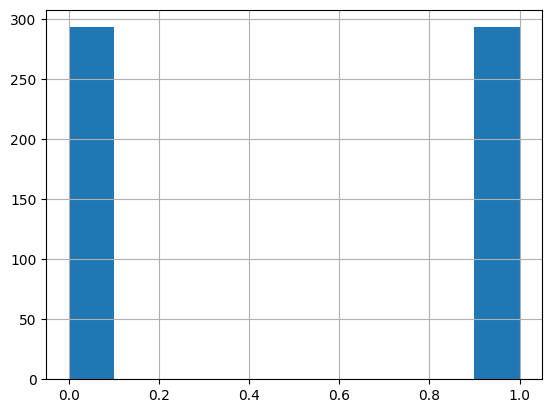

In [82]:
df_bal = pd.concat([worth, not_worth.sample(n=len(worth))], ignore_index=True)
df_bal['worthy'].hist()

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df_bal.drop(columns=['worthy'])
y = df_bal['worthy']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Normalizacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sprawdzenie wymiarów zbiorów treningowego i testowego
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((556, 59), (30, 59), (556,), (30,))

In [ ]:
from tensorflow.keras import callbacks, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel, Objective
from keras_tuner.tuners import BayesianOptimization

from datetime import datetime

class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        # Pierwsza warstwa Dense
        model.add(Dense(units=hp.Int('units_input', min_value=8, max_value=256, step=8),
                        activation=hp.Choice('activation_input', ['relu', 'elu']),
                        kernel_regularizer=regularizers.l2(hp.Float('l2_input', min_value=1e-5, max_value=1e-1)),
                        input_shape=(self.input_shape,)))

        # Opcjonalna warstwa BatchNormalization po pierwszej warstwie Dense
        if hp.Boolean('batch_norm_input'):
            model.add(BatchNormalization())

        # Opcjonalna warstwa Dropout po pierwszej warstwie Dense
        if hp.Boolean('dropout_input'):
            model.add(Dropout(rate=hp.Float('dropout_input_rate', min_value=0.0, max_value=0.75, step=0.05)))

        # Dodatkowe warstwy Dense
        for i in range(hp.Int('num_layers', 1, 8)):
            model.add(Dense(units=hp.Int(f'units_layer_{i}', min_value=16, max_value=256, step=16),
                            activation=hp.Choice(f'activation_{i}', ['relu', 'elu']),
                            kernel_regularizer=regularizers.l2(hp.Float(f'l2_layer_{i}', min_value=1e-5, max_value=1e-1)) if hp.Boolean(f'l2_layer_{i}_reg') else None))

            # Opcjonalna warstwa Dropout po każdej dodatkowej warstwie Dense
            model.add(Dropout(rate=hp.Float(f'dropout_layer_{i}', min_value=0.0, max_value=0.5, step=0.05)))

        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-2)),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice('batch_size', values=[2, 4, 8, 16, 32]),
            **kwargs,
        )

hypermodel = MyHyperModel(input_shape=X_train_scaled.shape[1])

tuner = BayesianOptimization(
    hypermodel,
    objective=Objective("val_accuracy", direction="max"),
    max_trials=100,
    executions_per_trial=2,
    directory=f'search{datetime.now()}',
    project_name=f'dupxo{datetime.now()}'
)

# Rozpocznij proces wyszukiwania. Pamiętaj, aby zastąpić `X_train_scaled`, `y_train` swoimi danymi.
tuner.search(X_train_scaled, y_train,
             epochs=500,
            #  batch_size=16,
             validation_split=0.2,
             callbacks=[callbacks.EarlyStopping(monitor='loss',
                                                mode='min',
                                                patience=5,
                                                verbose=1)])

best_model = tuner.get_best_models(num_models=1)[0]
best_model.save('/content/drive/MyDrive/models/token_selectioner_best_model.h5')

tuner.results_summary()

Trial 16 Complete [00h 00m 25s]
val_accuracy: 0.638392835855484

Best val_accuracy So Far: 0.71875
Total elapsed time: 00h 11m 02s


In [ ]:
test_loss, test_acc = best_model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

In [ ]:
# from tensorflow.keras import callbacks
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dropout(0.5),  # Dodanie warstwy Dropout z prawdopodobieństwem wyłączenia neuronów ustawionym na 0.5
#     Dense(64, activation='relu'),
#     Dropout(0.25),  # Ponownie dodanie warstwy Dropout
#     Dense(16, activation='relu'),
#     Dropout(0.05),  # Można dostosować prawdopodobieństwo w zależności od potrzeb i obserwacji
#     Dense(1, activation='sigmoid')
# ])

# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# print(model.summary())
# my_callbacks = [callbacks.EarlyStopping(monitor='val_loss',
#                                      mode='min',
#                                      min_delta=0.001,
#                                      patience=5,
#                                      verbose=1),
#                 # callbacks.ModelCheckpoint('model2/'),
#                 callbacks.TensorBoard(log_dir='./logs')]
# history = model.fit(X_train_scaled, y_train,
#                     batch_size=1,
#                     epochs=100,
#                     validation_split=0.2,
#                     callbacks=my_callbacks)

# test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
# print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

In [ ]:
%tensorboard --logdir logs

In [ ]:
import requests
from datetime import datetime, timezone, timedelta

LAUNCH_TIME = timedelta(minutes=2)
SKIP_TIME = timedelta(minutes=3)

def fetch_new_tokens():
    url = "https://api.geckoterminal.com/api/v2/networks/solana/new_pools"
    with requests.get(url) as response:
        response_json = response.json()
        return response_json['data']

def fetch_token_details(address_list):
    url = f"https://api.dexscreener.com/latest/dex/pairs/solana/{','.join(address_list)}"
    with requests.get(url) as response:
        response_json = response.json()
        # print(json.dumps(response_json, indent=3))
        valid_pairs = []
        for pair in response_json['pairs']:
            valid_pairs.append(pair)
        return valid_pairs

def details_to_df(token_details):
    rows = []  # Lista do przechowywania wszystkich wierszy

    for detail in token_details:
        row = {
            "chainId": detail["chainId"],
            "dexId": detail["dexId"],
            "url": detail["url"],
            "pairAddress": detail["pairAddress"],
            "baseTokenAddress": detail["baseToken"]["address"],
            "baseTokenName": detail["baseToken"]["name"],
            "baseTokenSymbol": detail["baseToken"]["symbol"],
            "quoteTokenAddress": detail["quoteToken"]["address"],
            "quoteTokenName": detail["quoteToken"]["name"],
            "quoteTokenSymbol": detail["quoteToken"]["symbol"],
            "priceNative": detail["priceNative"],
            "priceUsd": detail["priceUsd"],
            "txns_m5_buys": detail["txns"]["m5"]["buys"],
            "txns_m5_sells": detail["txns"]["m5"]["sells"],
            "txns_h1_buys": detail["txns"]["h1"]["buys"],
            "txns_h1_sells": detail["txns"]["h1"]["sells"],
            "txns_h6_buys": detail["txns"]["h6"]["buys"],
            "txns_h6_sells": detail["txns"]["h6"]["sells"],
            "txns_h24_buy": detail["txns"]["h24"]["buys"],
            "txns_h24_sells": detail["txns"]["h24"]["sells"],
            "volume_h24": detail["volume"]["h24"],
            "volume_h6": detail["volume"]["h6"],
            "volume_h1": detail["volume"]["h1"],
            "volume_m5": detail["volume"]["m5"],
            "priceChange_m5": detail["priceChange"]["m5"],
            "priceChange_h1": detail["priceChange"]["h1"],
            "priceChange_h6": detail["priceChange"]["h6"],
            "priceChange_h24": detail["priceChange"]["h24"],
            "liquidity_usd": detail["liquidity"]["usd"],
            "liquidity_base": detail["liquidity"]["base"],
            "liquidity_quote": detail["liquidity"]["quote"],
            "fdv": detail["fdv"],
            "pairCreatedAt": datetime.fromtimestamp(detail["pairCreatedAt"] / 1000).strftime('%Y-%m-%d %H:%M:%S')
        }
        rows.append(row)  # Dodawanie skonstruowanego wiersza do listy

    # Konwersja listy wierszy na DataFrame
    df = pd.DataFrame(rows)
    return df

In [ ]:
addresses = [token['attributes']['address'] for token in fetch_new_tokens()]
# addresses = ['eQV2ucvHe1MFu7gG9kCJLPPzHPdXcq4auLNanz6ZXBQ']
print(addresses)
valid_tokens = fetch_token_details(addresses)
new = details_to_df(valid_tokens)
names_vectors = new['baseTokenName'].apply(lambda x: pd.Series(model_n.get_word_vector(x)))
names_vectors.columns = [f'nameVectorDim{i}' for i in range(24)]
symbols_vectors = new['baseTokenSymbol'].apply(lambda x: pd.Series(model_s.get_word_vector(x)))
symbols_vectors.columns = [f'symbolVectorDim{i}' for i in range(12)]
new = pd.concat([new, names_vectors, symbols_vectors], axis=1)
new['liq_fdv_ratio'] = new['liquidity_usd']/new['fdv']
new['liq_fdv_ratio'] = new['liq_fdv_ratio'].replace([np.inf, -np.inf], 0).fillna(0)
to_drop = ['chainId','dexId','url','pairAddress','baseTokenAddress','baseTokenName','baseTokenSymbol','quoteTokenAddress','quoteTokenName','quoteTokenSymbol','pairCreatedAt']
new.drop(columns=to_drop, inplace=True)
# print(new)

In [ ]:
new_trans = scaler.transform(new)
preds = best_model.predict(new_trans)
for p,a in zip(preds, addresses):
  print(f'{p[0]*100:.1f}% {a}')

In [ ]:
new_trans

In [ ]:
new

In [ ]:
new.columns

ŚMIECIOWY KOD

In [ ]:
# import fasttext.util

# fasttext.util.download_model('en', if_exists='ignore')  # English

In [ ]:
import fasttext

ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
!cat /content/baseTokenName.txt

In [ ]:
model.predict("Pepe", k=3)

In [ ]:
model = ft.train('baseTokenName.txt', model='skipgram')

# Zapisz model, aby móc go później łatwo załadować
model.save_model('meme_token.bin')

# Uzyskaj wektor dla słowa
word_vector = model.get_word_vector('apple')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Label Encoding
label_encoder_name = LabelEncoder()
label_encoder_symbol = LabelEncoder()

encoded_baseTokenName = label_encoder_name.fit_transform(df['baseTokenName'])
encoded_baseTokenSymbol = label_encoder_symbol.fit_transform(df['baseTokenSymbol'])

# Przygotowanie danych dla PCA - połączenie zakodowanych kolumn
encoded_data = pd.DataFrame({
    'baseTokenName': encoded_baseTokenName,
    'baseTokenSymbol': encoded_baseTokenSymbol
})

# PCA - redukcja do 2 wymiarów dla przykładu
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_data)

# Dodajemy zredukowane dane do oryginalnego DataFrame
df['PCA_1'] = reduced_data[:, 0]
df['PCA_2'] = reduced_data[:, 1]

reduced_data[:5]

In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


# Przygotuj dane (możesz potrzebować dostosować czyszczenie danych do swojego przypadku)
# Zakładamy, że nazwy tokenów są unikalne słowa; jeśli nie, należy je odpowiednio przetworzyć
token_names = df['baseTokenName'].apply(lambda x: x.lower().split())
token_symbols = df['baseTokenSymbol'].apply(lambda x: x.lower().split())

# Połącz listy dla treningu modelu
all_tokens = token_names.tolist() + token_symbols.tolist()

# Trening modelu Word2Vec
model = Word2Vec(sentences=all_tokens, vector_size=16, window=5, min_count=1, workers=4)

# Możesz również załadować gotowy model zamiast trenować własny
# model = KeyedVectors.load_word2vec_format('model/word2vec/google_news/GoogleNews-vectors-negative300.bin', binary=True)

# Przykładowe użycie: przekształcenie tokena na embedding
# Zakładając, że chcemy przekształcić pierwszy token
token_embedding_example = model.wv[df['baseTokenName'][0].lower().split()]

print(token_embedding_example)

# Możesz teraz zastosować powyższy kod do każdego tokena, aby uzyskać ich embeddingi
# Następnie użyć tych embeddingów jako cech w twoim modelu klasyfikacyjnym


In [ ]:
model.wv.most_similar("Pepe Rasta".lower().split())

In [ ]:
token_names

In [ ]:
encoded_data

In [ ]:
df.to_csv('token_details_plus.csv')

In [ ]:
buy_signals

In [ ]:
len(buy_tokens)

In [ ]:
res = requests.get(f"https://api.dexscreener.com/latest/dex/pairs/solana/H1x2XeDVCVGoWXQ5RcgLa5boHKb8jKg8evjSsjJHeJYZ")
res.json()['pair']

In [ ]:
!pip install solana

In [ ]:
from solana.rpc.api import Client
from solders.pubkey import Pubkey
from solana.rpc.types import TokenAccountOpts

# Ustaw adres serwera RPC Solana (możesz użyć innego serwera, jeśli wolisz)
client = Client("https://api.mainnet-beta.solana.com/")

# Adres tokenu, dla którego chcesz znaleźć właściciela
token_mint_address = "E2gqudczMoCuYfEtxSj9f9TajJWeLErQCnm12MijyAQw"

# Opcje dla konta tokenu
opts = TokenAccountOpts(mint=Pubkey.from_string(token_mint_address))

# Wyszukaj konta posiadające określony token
response = client.get_token_accounts_by_owner(Pubkey.from_string(token_mint_address), opts).to_json()

# Wydrukuj informacje o kontach
# for account_info in response['result']['value']:
#     account_data = account_info['account']['data']
#     owner = account_info['account']['owner']
#     print(f"Konto: {account_info['pubkey']}, Właściciel: {owner}, Dane: {account_data}")
response

In [ ]:
token_mint_address = "7BgBvyjrZX1YKz4oh9mjb8ZScatkkwb8DzFx7LoiVkM3"

In [ ]:
import requests
from requests.structures import CaseInsensitiveDict

url = f"https://api.solscan.io/token/meta?tokenAddress={token_mint_address}"

headers = CaseInsensitiveDict()
headers["accept"] = "application/json"


resp = requests.get(url, headers=headers)

print(resp)

In [ ]:
response